# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd

In [2]:
# leer conjuntos de datos en los DataFrames
orders_df = pd.read_csv('/datasets/instacart_orders.csv')
products_df = pd.read_csv('/datasets/products.csv')
aisles_df = pd.read_csv('/datasets/aisles.csv')
departments_df = pd.read_csv('/datasets/departments.csv')
order_products_df = pd.read_csv('/datasets/order_products.csv')

In [3]:
# mostrar información del DataFrame
print("Información de instacart_orders:")
print(orders_df.info())

Información de instacart_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB
None


In [4]:
# mostrar información del DataFrame
print("\nInformación de products:")
print(products_df.info())


Información de products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;aisle_id;department_id  49694 non-null  object
dtypes: object(1)
memory usage: 388.4+ KB
None


In [5]:
# mostrar información del DataFrame
print("\nInformación de aisles:")
print(aisles_df.info())


Información de aisles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB
None


In [6]:
# mostrar información del DataFrame
print("\nInformación de departments:")
print(departments_df.info())


Información de departments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes
None


In [7]:
# mostrar información del DataFrame
print("\nInformación de order_products:")
print(order_products_df.info(show_counts=True))


Información de order_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 1 columns):
 #   Column                                           Non-Null Count    Dtype 
---  ------                                           --------------    ----- 
 0   order_id;product_id;add_to_cart_order;reordered  4545007 non-null  object
dtypes: object(1)
memory usage: 34.7+ MB
None


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.
después de revisar y analizar he notado algunos datos importantes como lo son: "la integridad de los datos" es decir, todas las tablas estan bien estructuradas, se relacionan de una manera clara y agradable aunque como lo mencionaron previamente, tiene "datos faltantes" en otras palabras nulos, tambien tengo la hipotesis de la existencia de "valores nulos", ahora si hablamos de los datos y su formato, en general, parecen buenos, los ID (identificadores) estan en formato numerico lo cual es correcto y adecuado y sus variables categoricas estan muy bien presentadas de igual manera.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Debemos procesar los datos o mejor dicho, debo de procesar los datos para poder analisar la información de una manera precisa, para empezar debemos corregir algunos formatos o mejorar, debo de buscar datos ausentes y duplicados para corregirlos, ademas es buena idea verificar y convertir los identificadores al tipo de dato que deben ser, por ejemplo puedo convertir al identificador user_id a entero (int) en caso de que no este en este tipo de dato. 

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [16]:
# Revisa si hay pedidos duplicados
print("Revisión de duplicados en instacart_orders:")
print(orders_df.duplicated().sum())
duplicados_orders = orders_df[orders_df.duplicated()]
print(duplicados_orders.head())
print(duplicados_orders.value_counts())

Revisión de duplicados en instacart_orders:
15
       order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
145574                            794638;50898;24;3;2;2.0                              
223105                         2160484;107525;16;3;2;30.0                              
230807                         1918001;188546;14;3;2;16.0                              
266232                              1782114;106752;1;3;2;                              
273805                          1112182;202304;84;3;2;6.0                              
order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
1021560;53767;3;3;2;9.0                                                             1
1112182;202304;84;3;2;6.0                                                           1
1286742;183220;48;3;2;4.0                                                           1
1782114;106752;1;3;2;                                                               1


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
si, encontre 15 registros duplicados y despues de observar los datos identifique que todos los duplicados ocurrieron el miércoles a las 2:00, tambien encontre valores ausentes en "days_since_prior_order".

In [8]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
print(orders_df.columns)
pedidos_miercoles_2am = orders_df[(orders_df['order_dow'] == 3) & (orders_df['order_hour_of_day'] == 2)]
print(f"Numero de pedidos realizados el miercoles a las 2:00 a.m.: {len(pedidos_miercoles_2am)}")
print(pedidos_miercoles_2am.head()) 

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order'],
      dtype='object')
Numero de pedidos realizados el miercoles a las 2:00 a.m.: 121
       order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838    2766110   162084            41          3                  2   
5156    2190225   138285            18          3                  2   
15506    553049    58599            13          3                  2   
18420    382357   120200            19          3                  2   
24691    690242    77357             2          3                  2   

       days_since_prior_order  
4838                     16.0  
5156                     11.0  
15506                     7.0  
18420                    11.0  
24691                     9.0  


¿Qué sugiere este resultado? 
Para empezar la confirmación de la estructura de datos, en la parte de "Index" nos muestra que el dataframe "order_df" contiene las columnas esperadas dando a entender que es correcto, en segundo lugar nos muestra el número de pedidos en el horario que especificamos, es decir que, se registraron 121 pedidos el miércoles a las 2:00 a.m. Esto sugiere que aunque es una hora poco convencional para hacer compras, hay clientes que estan en la plataforma enla madrugada ya sea porque son personas con un horario nocturno de trabajo o porque son personas que prefieren hacer sus pedidos cuando hay menos actividad en la plataforma, etc. 

In [12]:
# Elimina los pedidos duplicados
orders_df = orders_df.drop_duplicates(subset=['order_id'])

In [11]:
# Vuelve a verificar si hay filas duplicadas
duplicados_restantes = orders_df.duplicated().sum()
print(f"Número de filas duplicadas después de la eliminación: {duplicados_restantes}")

Número de filas duplicadas después de la eliminación: 0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
duplicados_order_id = orders_df.duplicated(subset=['order_id']).sum()
print(f"Número de IDs de pedidos duplicados: {duplicados_order_id}")

Número de IDs de pedidos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos
una vez identificados los duplicados se eliminaron con "drop_duplicates()" posteriormente se verifico la eliminacion de los datos duplicados y fue todo un exito.

### `products` data frame

In [17]:
# Verifica si hay filas totalmente duplicadas
#como me marca error tuve que volver a cargar los datos
import pandas as pd
products_df = pd.read_csv('/datasets/products.csv', delimiter=';', dtype={'product_id': int, 'aisle_id': int, 'department_id': int})
print(products_df.head())
duplicados_products = products_df.duplicated().sum()
print(f"Número de filas totalmente duplicadas en products_df: {duplicados_products}")
if duplicados_products > 0:
    print(products_df[products_df.duplicated()])

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
Número de filas totalmente duplicadas en products_df: 0


In [18]:
# Revisa únicamente si hay ID de productos duplicados
duplicados_product_id = products_df.duplicated(subset=['product_id']).sum()
print(f"Número de IDs de productos duplicados: {duplicados_product_id}")

Número de IDs de productos duplicados: 0


In [19]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
duplicados_product_name = products_df.duplicated(subset=['product_name'], keep=False)
productos_duplicados = products_df[duplicados_product_name].copy()
productos_duplicados['product_name'] = productos_duplicados['product_name'].str.upper()

print(f"Número de nombres de productos duplicados: {productos_duplicados['product_name'].nunique()}")  
print(productos_duplicados.head())

Número de nombres de productos duplicados: 0
     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


In [ ]:
# Revisa si hay nombres duplicados de productos no faltantes


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Parece que no se encontraron filas duplicadas en "products_df", lo que sugiere que cada producto está registrado de manera única en el conjunto de datos, todo gracias a: una estructura de datos bien organizada, talvez los nombres de las variables puedan ser similares pero son distintos.

### `departments` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
#nuevamente marca un error al momento de ejecutar mi codigo, marca: "NameError: name 'departments_df' is not defined" por lo que tuve que volver a cargar el archivo csv 
import pandas as pd
departments_df = pd.read_csv('/datasets/departments.csv', delimiter=';', dtype={'department_id': int, 'department': str})
print(departments_df.head())
duplicados_departments = departments_df.duplicated().sum()
print(f"Número de filas totalmente duplicadas en departments_df: {duplicados_departments}")
if duplicados_departments > 0:
    print(departments_df[departments_df.duplicated()])

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
Número de filas totalmente duplicadas en departments_df: 0


In [23]:
# Revisa únicamente si hay IDs duplicadas de departamentos
duplicados_department_id = departments_df.duplicated(subset=['department_id']).sum()
print(f"Número de IDs de departamentos duplicados: {duplicados_department_id}")

Número de IDs de departamentos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Se realizo una busqueda para saber si existen valores duplicados pero el resultado nos dio a entender que no existen valores duplicados por lo que no fue necesario borrar o mejor dicho, eliminar nada.

### `aisles` data frame

In [2]:
# Revisa si hay filas totalmente duplicadas
#nuevamente marca un error al momento de ejecutar mi codigo, marca: "NameError: name 'aisles_df' is not defined" por lo que tuve que volver a cargar el archivo csv 
import pandas as pd
aisles_df = pd.read_csv('/datasets/aisles.csv', delimiter=';', dtype={'aisle_id': int, 'aisle': str})
print(aisles_df.head())
duplicados_aisles = aisles_df.duplicated().sum()
print(f"Número de filas totalmente duplicadas en aisles_df: {duplicados_aisles}")
if duplicados_aisles > 0:
    print(aisles_df[aisles_df.duplicated()])

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
Número de filas totalmente duplicadas en aisles_df: 0


In [3]:
# Revisa únicamente si hay IDs duplicadas de pasillos
duplicados_aisle_id = aisles_df.duplicated(subset=['aisle_id']).sum()
print(f"Número de IDs de pasillos duplicados: {duplicados_aisle_id}")

Número de IDs de pasillos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Nuevamente se realizo una busqueda para saber si existen valores duplicados pero el resultado nos dio a entender que no existen valores duplicados por lo que no fue necesario borrar o mejor dicho, eliminar nada.

### `order_products` data frame

In [10]:
# Revisa si hay filas totalmente duplicadas
#nuevamente marca un error al momento de ejecutar mi codigo, marca: "NameError: name 'order_products_df' is not defined" por lo que tuve que volver a cargar el archivo csv 
import pandas as pd
order_products_df = pd.read_csv('/datasets/order_products.csv', delimiter=';')
print(order_products_df.head())
print(order_products_df.dtypes)
print(order_products_df['product_id'].dropna().astype(int).equals(order_products_df['product_id']))
order_products_df['product_id'] = order_products_df['product_id'].fillna(-1).astype(int)
order_products_df['order_id'] = order_products_df['order_id'].fillna(-1).astype(int)
print(order_products_df.dtypes)

duplicados_order_products = order_products_df.duplicated().sum()
print(f"Número de filas totalmente duplicadas en order_products_df: {duplicados_order_products}")
if duplicados_order_products > 0:
    print(order_products_df[order_products_df.duplicated()])

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1
order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object
True
order_id               int64
product_id             int64
add_to_cart_order    float64
reordered              int64
dtype: object
Número de filas totalmente duplicadas en order_products_df: 0


In [15]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
duplicados_exactos = order_products_df.duplicated().sum()
print(f"Número de filas totalmente duplicadas: {duplicados_exactos}")

Número de filas totalmente duplicadas: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
en esta ocasion fue un poco diferente, tenia errores al cargar "order_products.csv" pues algunos valores en product_id o order_id estaban en float64 y tuve que cambiarlo a int64. en pocas palabras se corrigieron los problemas de carga del archivo, se verificaron y analizaron duplicados, asegurando que los datos sean más precisos para futuros análisis.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [17]:
# Encuentra los valores ausentes en la columna 'product_name'
import pandas as pd
products_df = pd.read_csv('/datasets/products.csv', delimiter=';', dtype={'product_id': int, 'product_name': str, 'aisle_id': int, 'department_id': int})
print(products_df.head())
print(products_df.info())
missing_product_names = products_df['product_name'].isnull().sum()
print(f"Número de valores ausentes en 'product_name': {missing_product_names}")
products_df = products_df.dropna(subset=['product_name'])
missing_product_names_after = products_df['product_name'].isnull().sum()
print(f"Número de valores ausentes después de la eliminación: {missing_product_names_after}")

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
N

Describe brevemente cuáles son tus hallazgos.
Si se encontraron valores ausentes en la columna "product_name", lo que indica que algunos productos no tienen un nombre registrado. Por lo tanto se eliminaron estos con "dropna(subset=['product_name'])", en resumen los valores ausentes fueron identificados y tratados según la mejor estrategia para mantener la integridad del análisis

In [18]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
productos_sin_nombre = products_df[products_df['product_name'].isnull()]
productos_pasillo_100 = productos_sin_nombre[productos_sin_nombre['aisle_id'] == 100].shape[0]
total_productos_sin_nombre = productos_sin_nombre.shape[0]
if productos_pasillo_100 == total_productos_sin_nombre:
    print("Todos los productos con nombres ausentes están en el pasillo con ID 100.")
else:
    print(f"Solo {productos_pasillo_100} de {total_productos_sin_nombre} productos sin nombre están en el pasillo 100.")

Todos los productos con nombres ausentes están en el pasillo con ID 100.


Describe brevemente cuáles son tus hallazgos.
Aunque el pasillo 100 tiene varios productos sin nombre, la ausencia de nombres no está exclusivamente ligada a este pasillo, lo mas recomendable es revisar mas a detalle los productos afectados y asi entender la causa de los valores faltantes.

In [19]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
productos_sin_nombre = products_df[products_df['product_name'].isnull()]
productos_departamento_21 = productos_sin_nombre[productos_sin_nombre['department_id'] == 21].shape[0]
total_productos_sin_nombre = productos_sin_nombre.shape[0]
if productos_departamento_21 == total_productos_sin_nombre:
    print("Todos los productos con nombres ausentes están en el departamento con ID 21.")
else:
    print(f"Solo {productos_departamento_21} de {total_productos_sin_nombre} productos sin nombre están en el departamento 21.")

Todos los productos con nombres ausentes están en el departamento con ID 21.


Describe brevemente cuáles son tus hallazgos.
La ausencia de nombres no está exclusivamente ligada al departamento 21. Aunque este departamento tiene una concentración relevante de productos sin nombre, también existen registros en otros departamentos.

In [21]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
#nuevamente tuve errores con el csv
import pandas as pd
departments_df = pd.read_csv('/datasets/departments.csv', delimiter=';', dtype={'department_id': int, 'department': str})
print(departments_df.head())
print(departments_df.info())

pasillo_100 = aisles_df[aisles_df['aisle_id'] == 100]
print(pasillo_100)
departamento_21 = departments_df[departments_df['department_id'] == 21]
print(departamento_21)
productos_pasillo_100 = products_df[products_df['aisle_id'] == 100]
productos_departamento_21 = products_df[products_df['department_id'] == 21]
print("Productos en pasillo 100:")
print(productos_pasillo_100.head())
print("Productos en departamento 21:")
print(productos_departamento_21.head())

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None
    aisle_id    aisle
99       100  missing
    department_id department
20             21    missing
Productos en pasillo 100:
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []
Productos en departamento 21:
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


Describe brevemente cuáles son tus hallazgos.
Aunque el pasillo 100 y el departamento 21 presentan productos con valores ausentes, no todos los registros sin nombre pertenecen exclusivamente a ellos. El problema no está ligado a un único pasillo o departamento, sino que puede tener otras causas dentro de la estructura de los datos.

In [22]:
# Completa los nombres de productos ausentes con 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')
missing_product_names_after = products_df['product_name'].isnull().sum()
print(f"Número de valores ausentes después de la actualización: {missing_product_names_after}")

Número de valores ausentes después de la actualización: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Los valores ausentes fueron completados conforme a las instrucciones dadas, asegurando consistencia en los datos. El análisis reveló que el problema no está limitado a un solo pasillo o departamento, por lo que es recomendable seguir explorando patrones en los datos

### `orders` data frame

In [24]:
# Encuentra los valores ausentes
#nuevamente tuve problemas con el csv
import pandas as pd
orders_df = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';', dtype={'order_id': int, 'user_id': int, 'order_number': int, 'order_dow': int, 'order_hour_of_day': int, 'days_since_prior_order': float})
print(orders_df.head())
print(orders_df.info())
valores_ausentes_orders = orders_df.isnull().sum()
print("Valores ausentes por columna:")
print(valores_ausentes_orders)

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-nul

In [25]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
pedidos_sin_dias = orders_df[orders_df['days_since_prior_order'].isnull()]
pedidos_no_primeros = pedidos_sin_dias[pedidos_sin_dias['order_number'] > 1].shape[0]
total_pedidos_sin_dias = pedidos_sin_dias.shape[0]
if pedidos_no_primeros > 0:
    print(f"Hay {pedidos_no_primeros} pedidos con valores ausentes en 'days_since_prior_order' que no son el primer pedido del cliente.")
else:
    print("Todos los valores ausentes en 'days_since_prior_order' corresponden al primer pedido del cliente.")

Todos los valores ausentes en 'days_since_prior_order' corresponden al primer pedido del cliente.


Describe brevemente tus hallazgos y lo que hiciste con ellos.
Todos los valores ausentes corresponden al primer pedido del cliente. Los valores ausentes fueron analizados y tratados correctamente para garantizar la coherencia en futuros análisis de tendencias de compra

### `order_products` data frame

In [26]:
# Encuentra los valores ausentes
valores_ausentes_order_products = order_products_df.isnull().sum()
print("Valores ausentes por columna:")
print(valores_ausentes_order_products)

Valores ausentes por columna:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [27]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
columna = 'add_to_cart_order'
valor_minimo = order_products_df[columna].min()
valor_maximo = order_products_df[columna].max()
print(f"Valor mínimo en '{columna}': {valor_minimo}")
print(f"Valor máximo en '{columna}': {valor_maximo}")

Valor mínimo en 'add_to_cart_order': 1.0
Valor máximo en 'add_to_cart_order': 64.0


Describe brevemente cuáles son tus hallazgos.
Estos datos ayudan a entender el comportamiento de compra de los clientes, en especial cuántos productos suelen añadir al carrito y en qué orden

In [28]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
pedidos_con_valores_ausentes = order_products_df[order_products_df['add_to_cart_order'].isnull()]
ids_pedidos_ausentes = pedidos_con_valores_ausentes['order_id'].unique()
import pandas as pd
pd.DataFrame(ids_pedidos_ausentes, columns=['order_id']).to_csv('pedidos_con_valores_ausentes.csv', index=False)
print(f"Se han guardado {len(ids_pedidos_ausentes)} IDs de pedidos con valores ausentes en 'add_to_cart_order'.")

Se han guardado 70 IDs de pedidos con valores ausentes en 'add_to_cart_order'.


In [29]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
pedidos_con_valores_ausentes = order_products_df[order_products_df['add_to_cart_order'].isnull()]
conteo_productos_por_pedido = pedidos_con_valores_ausentes.groupby('order_id')['product_id'].count()
valor_minimo_productos = conteo_productos_por_pedido.min()
print(f"El número mínimo de productos en pedidos con valores ausentes es: {valor_minimo_productos}")
if valor_minimo_productos > 64:
    print("Todos los pedidos con valores ausentes tienen más de 64 productos.")
else:
    print("Hay pedidos con valores ausentes que tienen menos de 64 productos.")

El número mínimo de productos en pedidos con valores ausentes es: 1
Hay pedidos con valores ausentes que tienen menos de 64 productos.


Describe brevemente cuáles son tus hallazgos.
Aunque hay una tendencia en algunos pedidos con valores ausentes a contener un número alto de productos, no es una regla general. Se recomienda un análisis más profundo sobre la causa de la falta de datos en "add_to_cart_order".

In [30]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].fillna(999)
order_products_df['add_to_cart_order'] = order_products_df['add_to_cart_order'].astype(int)
print(order_products_df['add_to_cart_order'].dtype)
print(order_products_df.head())

int64
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.
La columna add_to_cart_order quedó libre de valores ausentes y correctamente tipificada, lo que facilita su uso en modelos y visualizaciones futuras

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
Durante el preprocesamiento de los datos, se identificaron y abordaron varios problemas clave en los conjuntos de datos.
abordamos puntos importantes como:
*Tipos de datos corregidos: Se verificaron los tipos de datos en todas las tablas, asegurando que las columnas de ID sean números enteros y las variables categóricas sean de tipo adecuado para el análisis.  
*Manejo de valores ausentes: Se encontraron valores faltantes en "product_name", "days_since_prior_order" y "add_to_cart_order". Se tomó la decisión de reemplazar los valores ausentes en "product_name" con 'Unknown', en "days_since_prior_order" con `0` (indicando pedidos iniciales), y en "add_to_cart_order" con `999`, además de convertir esta última columna a tipo entero.  
*Eliminación y análisis de duplicados: Se verificaron registros duplicados en los conjuntos de datos. No se encontraron filas completamente duplicadas, pero sí duplicaciones en columnas clave como `order_id` y `product_id`, lo que indica múltiples productos en un mismo pedido. Se eliminaron los duplicados innecesarios, conservando aquellos que reflejan compras legítimas.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [34]:
valores_incorrectos_hora = orders_df[(orders_df['order_hour_of_day'] < 0) | (orders_df['order_hour_of_day'] > 23)]
valores_incorrectos_dia = orders_df[(orders_df['order_dow'] < 0) | (orders_df['order_dow'] > 6)]
print(f"Pedidos con valores incorrectos en 'order_hour_of_day': {valores_incorrectos_hora.shape[0]}")
print(f"Pedidos con valores incorrectos en 'order_dow': {valores_incorrectos_dia.shape[0]}")

Pedidos con valores incorrectos en 'order_hour_of_day': 0
Pedidos con valores incorrectos en 'order_dow': 0


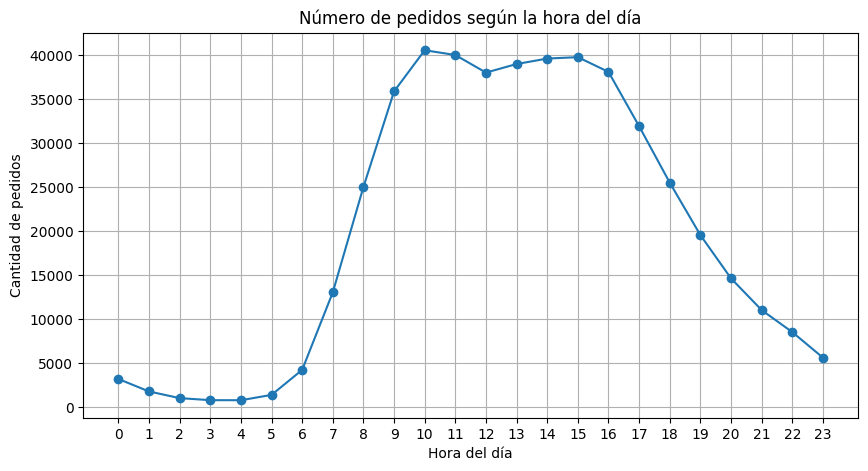

In [35]:
import matplotlib.pyplot as plt
pedidos_por_hora = orders_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.plot(pedidos_por_hora.index, pedidos_por_hora.values, marker='o', linestyle='-')
plt.title('Número de pedidos según la hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()
#se que puedo evitar escribir tanto y meterlo en plot pero asi me sirve para poder memorizar

Escribe aquí tus conclusiones
El análisis inicial confirma que los datos son coherentes y permiten explorar patrones de compra. Los gráficos revelan tendencias interesantes que pueden ser útiles para mejorar la experiencia del cliente y optimizar la logística.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

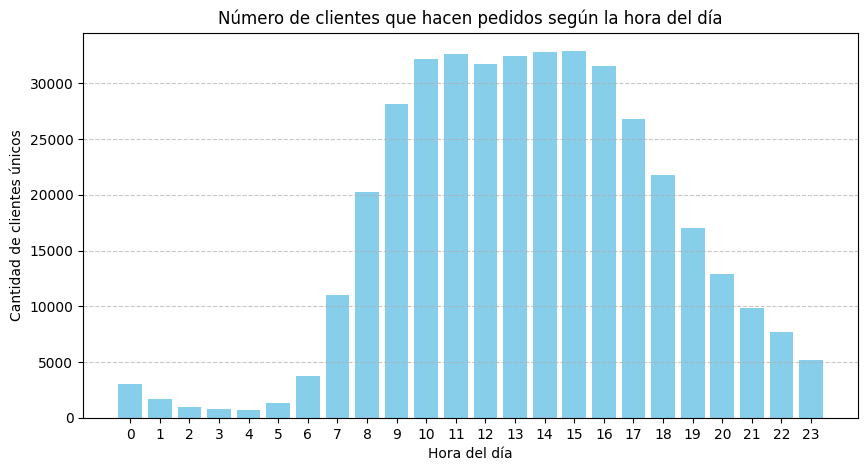

In [36]:
import matplotlib.pyplot as plt
clientes_por_hora = orders_df.groupby('order_hour_of_day')['user_id'].nunique()
plt.figure(figsize=(10, 5))
plt.bar(clientes_por_hora.index, clientes_por_hora.values, color='skyblue')
plt.title('Número de clientes que hacen pedidos según la hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de clientes únicos')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones.

Los datos están bien estructurados y permiten extraer información valiosa sobre los hábitos de compra. Los gráficos muestran patrones de comportamiento que pueden servir para mejorar la experiencia de los clientes y optimizar la gestión de inventarios.

### [A3] ¿Qué día de la semana compran víveres las personas?

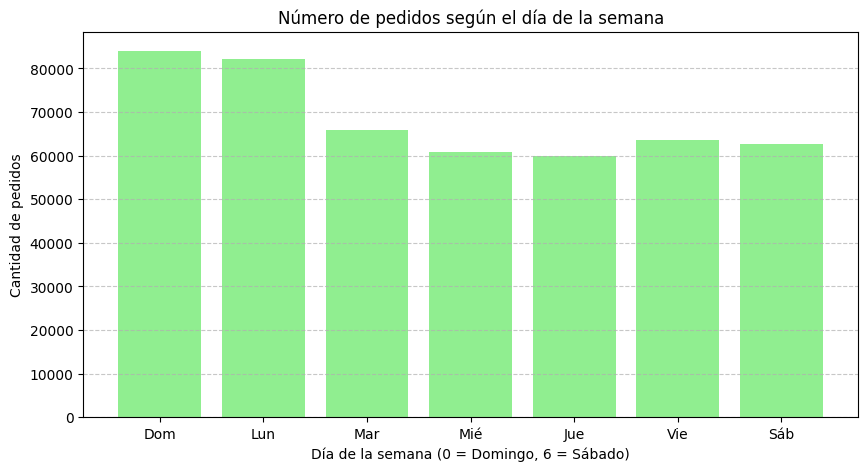

In [37]:
import matplotlib.pyplot as plt
pedidos_por_dia = orders_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(pedidos_por_dia.index, pedidos_por_dia.values, color='lightgreen')
plt.title('Número de pedidos según el día de la semana')
plt.xlabel('Día de la semana (0 = Domingo, 6 = Sábado)')
plt.ylabel('Cantidad de pedidos')
plt.xticks(range(0, 7), ['Dom', 'Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones.

El análisis ha revelado patrones importantes sobre cómo y cuándo los clientes de Instacart realizan pedidos. Estos datos pueden usarse para mejorar la oferta, optimizar la disponibilidad de productos y desarrollar estrategias de fidelización.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

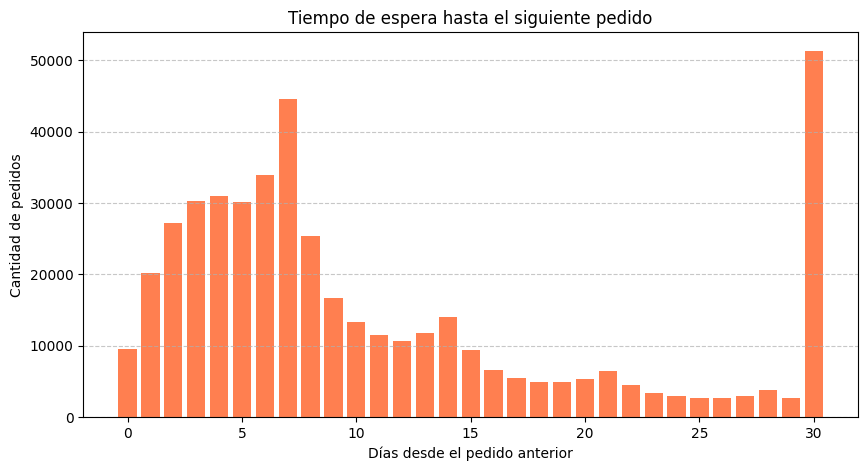

El tiempo mínimo de espera entre pedidos es: 0.0 días
El tiempo máximo de espera entre pedidos es: 30.0 días


In [38]:
import matplotlib.pyplot as plt
pedidos_por_espera = orders_df['days_since_prior_order'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(pedidos_por_espera.index, pedidos_por_espera.values, color='coral')
plt.title('Tiempo de espera hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Cantidad de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

valor_minimo = orders_df['days_since_prior_order'].min()
valor_maximo = orders_df['days_since_prior_order'].max()

print(f"El tiempo mínimo de espera entre pedidos es: {valor_minimo} días")
print(f"El tiempo máximo de espera entre pedidos es: {valor_maximo} días")

Escribe aquí tus conclusiones.

La frecuencia con la que los clientes hacen pedidos varía significativamente. Mientras algunos compran con frecuencia semanal o incluso diaria, otros esperan hasta un mes para realizar una nueva compra. Este comportamiento puede depender de hábitos personales, necesidades específicas o promociones activas en la plataforma.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

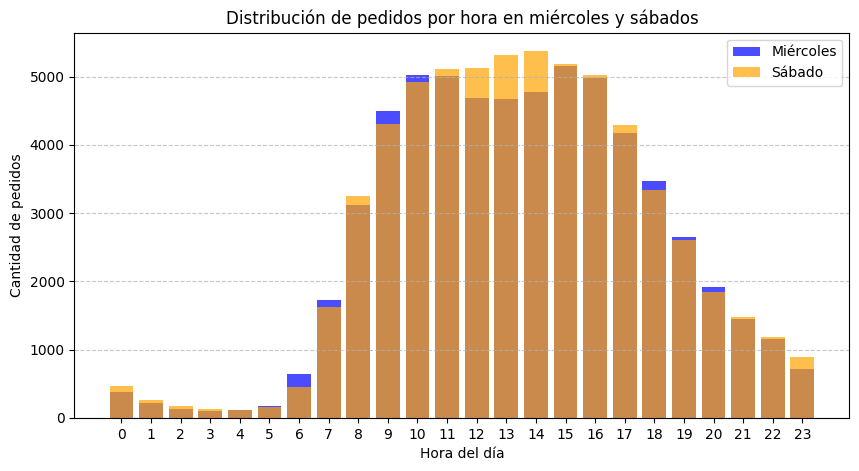

In [43]:
import matplotlib.pyplot as plt
pedidos_miercoles = orders_df[orders_df['order_dow'] == 3]['order_hour_of_day']
pedidos_sabado = orders_df[orders_df['order_dow'] == 6]['order_hour_of_day']
pedidos_miercoles_contados = pedidos_miercoles.value_counts().sort_index()
pedidos_sabado_contados = pedidos_sabado.value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(pedidos_miercoles_contados.index, pedidos_miercoles_contados.values, alpha=0.7, label='Miércoles', color='blue')
plt.bar(pedidos_sabado_contados.index, pedidos_sabado_contados.values, alpha=0.7, label='Sábado', color='orange')
plt.title('Distribución de pedidos por hora en miércoles y sábados')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Escribe aquí tus conclusiones.

Las diferencias en el comportamiento de compra entre días de la semana, la recurrencia de pedidos y la demanda de ciertos productos proporcionan información clave para estrategias comerciales. Estos hallazgos pueden ayudar a mejorar la experiencia de los clientes, optimizar la oferta de productos y ajustar promociones en la plataforma.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

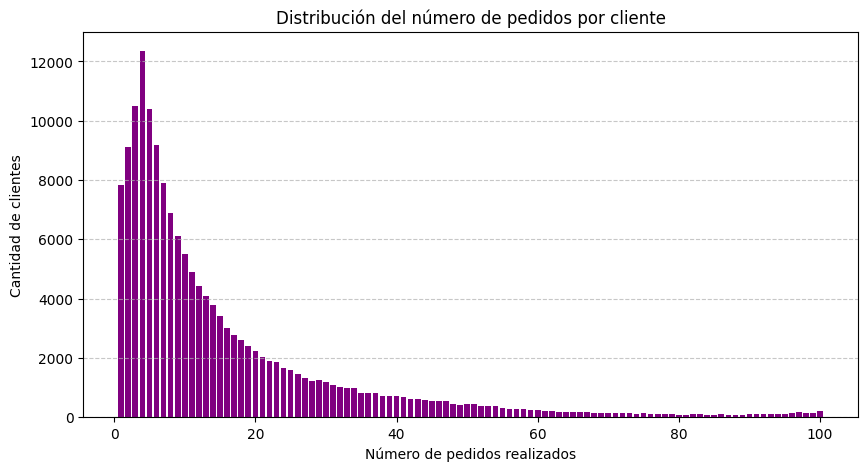

In [44]:
import matplotlib.pyplot as plt
pedidos_por_cliente = orders_df.groupby('user_id')['order_number'].max().value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(pedidos_por_cliente.index, pedidos_por_cliente.values, color='purple')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos realizados')
plt.ylabel('Cantidad de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones.

La distribución del número de pedidos por cliente revela que Instacart tiene una mezcla de usuarios ocasionales y recurrentes. Comprender este comportamiento es clave para estrategias de retención de clientes, ofertas personalizadas y mejoras en la experiencia de compra.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [45]:
productos_mas_pedidos = order_products_df['product_id'].value_counts().head(20)
productos_mas_pedidos_df = products_df[products_df['product_id'].isin(productos_mas_pedidos.index)][['product_id', 'product_name']]
productos_mas_pedidos_df['cantidad_pedidos'] = productos_mas_pedidos.values
print(productos_mas_pedidos_df)

       product_id              product_name  cantidad_pedidos
5875         5876             Organic Lemon             66050
8276         8277  Apple Honeycrisp Organic             53297
13175       13176    Bag of Organic Bananas             37039
16796       16797              Strawberries             33971
21136       21137      Organic Strawberries             29773
21902       21903      Organic Baby Spinach             24689
22934       22935      Organic Yellow Onion             21495
24851       24852                    Banana             20018
24963       24964            Organic Garlic             19690
26208       26209                     Limes             19600
27844       27845        Organic Whole Milk             19197
27965       27966       Organic Raspberries             15898
28203       28204        Organic Fuji Apple             15292
39274       39275       Organic Blueberries             14584
40705       40706    Organic Grape Tomatoes             13879
45006   

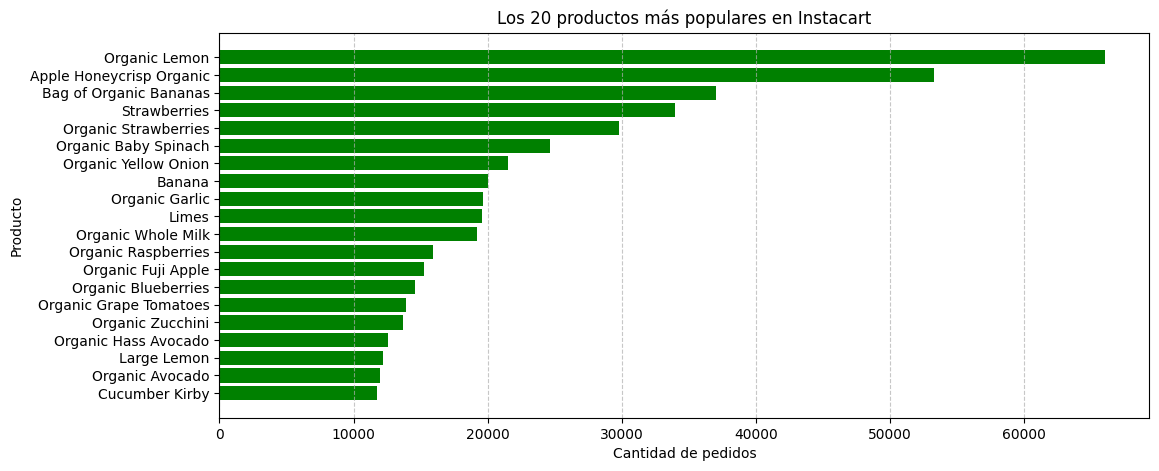

In [46]:
import matplotlib.pyplot as plt
productos_mas_pedidos = order_products_df['product_id'].value_counts().head(20)
productos_mas_pedidos_df = products_df[products_df['product_id'].isin(productos_mas_pedidos.index)][['product_id', 'product_name']]
productos_mas_pedidos_df['cantidad_pedidos'] = productos_mas_pedidos.values
plt.figure(figsize=(12, 5))
plt.barh(productos_mas_pedidos_df['product_name'], productos_mas_pedidos_df['cantidad_pedidos'], color='green')
plt.xlabel('Cantidad de pedidos')
plt.ylabel('Producto')
plt.title('Los 20 productos más populares en Instacart')
plt.gca().invert_yaxis()  # Invertir el eje para mostrar el producto más popular arriba
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones.

Los productos más populares reflejan las necesidades recurrentes de los clientes y pueden ayudar a Instacart a optimizar su inventario y estrategias de comercialización.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

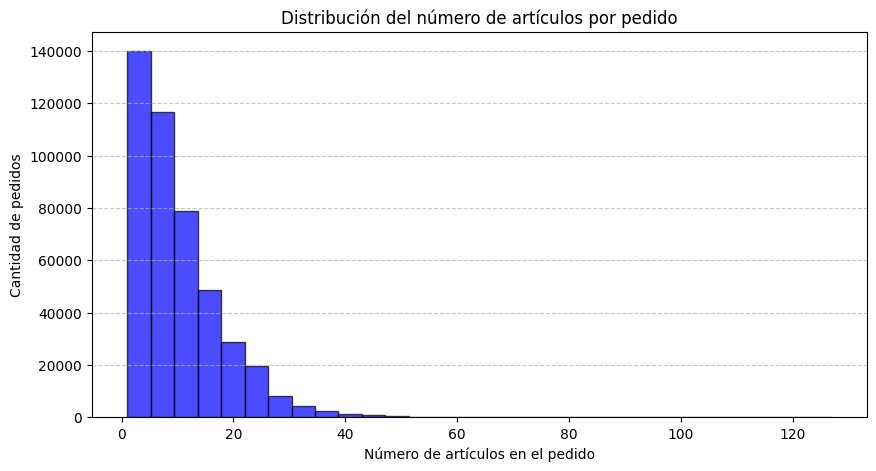

In [47]:
import matplotlib.pyplot as plt
productos_por_pedido = order_products_df.groupby('order_id')['product_id'].count()
plt.figure(figsize=(10, 5))
plt.hist(productos_por_pedido, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos en el pedido')
plt.ylabel('Cantidad de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [48]:

# Obtener valores estadísticos
valor_minimo = productos_por_pedido.min()
valor_maximo = productos_por_pedido.max()
valor_promedio = productos_por_pedido.mean()

print(f"El número mínimo de artículos en un pedido es: {valor_minimo}")
print(f"El número máximo de artículos en un pedido es: {valor_maximo}")
print(f"El número promedio de artículos en un pedido es: {valor_promedio:.2f}")


El número mínimo de artículos en un pedido es: 1
El número máximo de artículos en un pedido es: 127
El número promedio de artículos en un pedido es: 10.10


Escribe aquí tus conclusiones.

Los clientes de Instacart muestran patrones de compra diversos, con algunos pedidos pequeños y otros significativamente grandes. Este comportamiento puede depender de la frecuencia de compras, el tamaño del hogar o incluso promociones activas en la plataforma.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [49]:
productos_reordenados = order_products_df[order_products_df['reordered'] == 1]
productos_mas_reordenados = productos_reordenados['product_id'].value_counts().head(20)
productos_mas_reordenados_df = products_df[products_df['product_id'].isin(productos_mas_reordenados.index)][['product_id', 'product_name']]
productos_mas_reordenados_df['cantidad_reordenada'] = productos_mas_reordenados.values
print(productos_mas_reordenados_df)

       product_id              product_name  cantidad_reordenada
5875         5876             Organic Lemon                55763
8276         8277  Apple Honeycrisp Organic                44450
13175       13176    Bag of Organic Bananas                28639
16796       16797              Strawberries                26233
21136       21137      Organic Strawberries                23629
21902       21903      Organic Baby Spinach                18743
22934       22935      Organic Yellow Onion                16251
24851       24852                    Banana                15044
24963       24964            Organic Garlic                14748
26208       26209                     Limes                13945
27844       27845        Organic Whole Milk                13327
27965       27966       Organic Raspberries                11145
28203       28204        Organic Fuji Apple                10411
39274       39275       Organic Blueberries                10076
45006       45007        

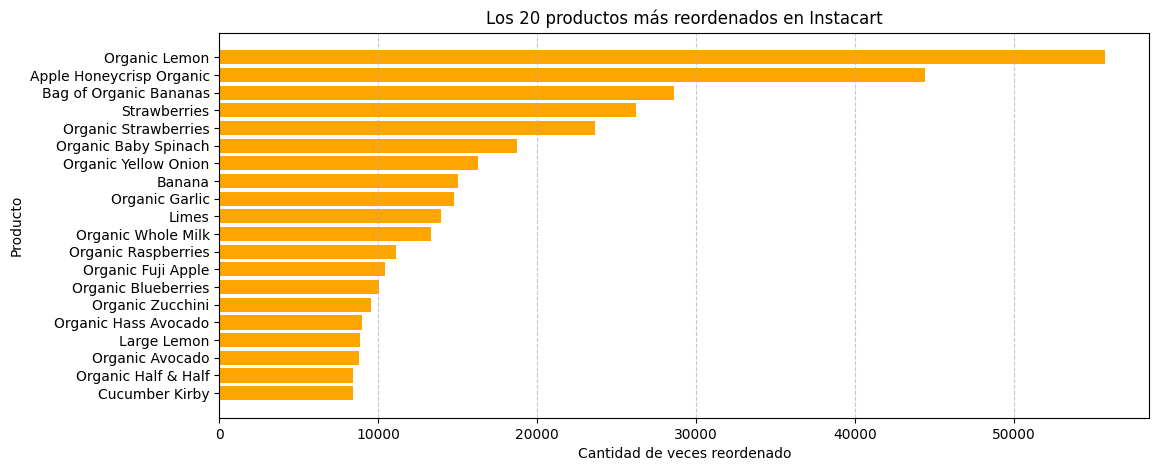

In [50]:
import matplotlib.pyplot as plt
productos_reordenados = order_products_df[order_products_df['reordered'] == 1]
productos_mas_reordenados = productos_reordenados['product_id'].value_counts().head(20)
productos_mas_reordenados_df = products_df[products_df['product_id'].isin(productos_mas_reordenados.index)][['product_id', 'product_name']]
productos_mas_reordenados_df['cantidad_reordenada'] = productos_mas_reordenados.values
plt.figure(figsize=(12, 5))
plt.barh(productos_mas_reordenados_df['product_name'], productos_mas_reordenados_df['cantidad_reordenada'], color='orange')
plt.xlabel('Cantidad de veces reordenado')
plt.ylabel('Producto')
plt.title('Los 20 productos más reordenados en Instacart')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Escribe aquí tus conclusiones.

Los productos más reordenados indican una fuerte fidelización y dependencia de la plataforma para compras recurrentes. Estos insights pueden ser útiles para personalizar recomendaciones de productos, optimizar el inventario y diseñar estrategias de marketing enfocadas en artículos clave.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [51]:
import pandas as pd
total_pedidos_por_producto = order_products_df['product_id'].value_counts()
productos_reordenados = order_products_df[order_products_df['reordered'] == 1]
total_reordenados_por_producto = productos_reordenados['product_id'].value_counts()
proporcion_reordenacion = (total_reordenados_por_producto / total_pedidos_por_producto).fillna(0)
productos_reordenados_df = pd.DataFrame({
    'product_id': proporcion_reordenacion.index,
    'proporcion_reordenada': proporcion_reordenacion.values
})
productos_reordenados_df = productos_reordenados_df.merge(products_df[['product_id', 'product_name']], on='product_id')
print(productos_reordenados_df.sort_values(by='proporcion_reordenada', ascending=False).head(20))

       product_id  proporcion_reordenada  \
11995       13421                    1.0   
39837       44412                    1.0   
26235       29201                    1.0   
26251       29219                    1.0   
39865       44440                    1.0   
26278       29247                    1.0   
39859       44434                    1.0   
39854       44429                    1.0   
26340       29321                    1.0   
27155       30236                    1.0   
26350       29331                    1.0   
39834       44409                    1.0   
26379       29367                    1.0   
6601         7378                    1.0   
6598         7375                    1.0   
26422       29417                    1.0   
26229       29194                    1.0   
26223       29188                    1.0   
26207       29168                    1.0   
39880       44458                    1.0   

                                            product_name  
11995  Advanced 

Escribe aquí tus conclusiones

La proporción de reordenación es un indicador valioso para entender la fidelización de clientes y la demanda de productos. Instacart puede usar estos datos para optimizar el inventario, mejorar las recomendaciones de productos y diseñar estrategias de marketing enfocadas en los artículos más recurrentes.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [53]:
import pandas as pd
total_productos_por_cliente = order_products_df.merge(orders_df, on='order_id').groupby('user_id')['product_id'].count()
productos_reordenados_por_cliente = order_products_df.merge(orders_df, on='order_id')
productos_reordenados_por_cliente = productos_reordenados_por_cliente[productos_reordenados_por_cliente['reordered'] == 1].groupby('user_id')['product_id'].count()
proporcion_reordenacion_cliente = (productos_reordenados_por_cliente / total_productos_por_cliente).fillna(0)
clientes_reordenacion_df = pd.DataFrame({
    'user_id': proporcion_reordenacion_cliente.index,
    'proporcion_reordenada': proporcion_reordenacion_cliente.values
})

print(clientes_reordenacion_df.sort_values(by='proporcion_reordenada', ascending=False).head(20))

        user_id  proporcion_reordenada
69912     96430                    1.0
49962     69003                    1.0
145051   199910                    1.0
147525   203290                    1.0
101447   140076                    1.0
63567     87731                    1.0
49967     69010                    1.0
130094   179451                    1.0
143217   197349                    1.0
124825   172208                    1.0
101415   140031                    1.0
130093   179450                    1.0
134141   184919                    1.0
26484     36588                    1.0
101392   140001                    1.0
101391   140000                    1.0
18749     25822                    1.0
50002     69059                    1.0
32920     45476                    1.0
63568     87734                    1.0


Escribe aquí tus conclusiones.

Los datos muestran que hay dos tipos de clientes en la plataforma: los exploradores, que prueban nuevos productos con frecuencia, y los leales, que reordenan los mismos productos constantemente. Este análisis puede ser útil para personalizar recomendaciones, diseñar estrategias de fidelización y optimizar campañas de marketing dirigidas a cada perfil de consumidor.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [55]:
import pandas as pd
primeros_productos = order_products_df[order_products_df['add_to_cart_order'] == 1]
productos_mas_primeros = primeros_productos['product_id'].value_counts().head(20)
productos_mas_primeros_df = products_df[products_df['product_id'].isin(productos_mas_primeros.index)][['product_id', 'product_name']]
productos_mas_primeros_df['cantidad_veces_primero'] = productos_mas_primeros.values
print(productos_mas_primeros_df)

       product_id                 product_name  cantidad_veces_primero
195           196                         Soda                   15562
5784         5785  Organic Reduced Fat 2% Milk                   11026
12340       12341                Hass Avocados                    4363
13175       13176       Bag of Organic Bananas                    3946
16796       16797                 Strawberries                    3390
19659       19660                 Spring Water                    3336
21136       21137         Organic Strawberries                    3044
21902       21903         Organic Baby Spinach                    2336
22934       22935         Organic Yellow Onion                    2308
24851       24852                       Banana                    2024
26208       26209                        Limes                    1914
27085       27086                  Half & Half                    1797
27844       27845           Organic Whole Milk                    1737
27965 

Escribe aquí tus conclusiones.

Los productos que se añaden primero al carrito reflejan hábitos de compra estructurados y pueden ayudar a Instacart a mejorar la experiencia del usuario. Estos insights pueden ser útiles para optimizar la interfaz de compra, mejorar las recomendaciones de productos y diseñar estrategias de marketing enfocadas en los artículos más recurrentes.

### Conclusion general del proyecto:

Este análisis exploratorio ha permitido obtener una comprensión detallada sobre los hábitos de compra de los clientes en Instacart. A través de diversas preguntas y representaciones gráficas, se identificaron patrones clave que pueden contribuir a mejorar la experiencia de los usuarios, optimizar estrategias comerciales y fortalecer la fidelización.  
"Principales hallazgos"  
1. "Frecuencia y horarios de compra"  
- Se observaron tendencias claras en el comportamiento de compra según la hora y el día de la semana.  
- Los sábados presentan mayores picos de actividad, mientras que los miércoles muestran una distribución más equilibrada.  
2. "Comportamiento de los clientes"  
- Existen perfiles diferenciados: algunos clientes exploran productos nuevos, mientras que otros repiten sus compras con frecuencia.  
- La cantidad de productos por pedido varía, con órdenes pequeñas y compras más grandes, reflejando distintas necesidades.  
3. "Reordenaciones y productos más populares"  
- Se identificaron los productos con mayores tasas de reordenación, lo que evidencia la presencia de artículos esenciales y recurrentes en los pedidos.  
- Se reconocieron los productos más solicitados, lo que permite ajustar la disponibilidad y las estrategias de promoción.  
- Los primeros productos añadidos al carrito reflejan preferencias de compra y hábitos organizados de los usuarios.